# ==========================
# Data Analytics Final Project
# Dataset: Absenteeism at Work
# Domain: Human Resources (HR Analytics)
# ==========================
**Domain: Human Resources (HR Analytics)**  
This project belongs to the Human Resources domain. It focuses on employee absenteeism, a major HR issue that affects productivity, workforce planning, and overall organizational efficiency. By analyzing absenteeism patterns, HR managers can identify the most frequent reasons for absence, evaluate the impact of personal and workplace factors, and design better employee engagement and wellness programs.
**Problem Statement**  
Employee absenteeism is a recurring challenge in organizations that leads to reduced productivity, loss of working hours, and operational inefficiency. The aim of this project is to identify the major factors influencing absenteeism and to analyze how demographic, health, and work-related factors contribute to employee absence.
**Objectives**  
1. To analyze demographic and workplace factors that influence absenteeism.  
2. To identify the most frequent reasons for employee absence.  
3. To study how absenteeism varies by age, gender, seasons, and health-related issues.  
4. To generate HR insights that can help organizations reduce absenteeism.  
5. To visualize absenteeism trends through different statistical and graphical methods.  
**Dataset Description**  
The dataset used is "Absenteeism at Work" from the UCI Repository. It contains 8,335 records and 21 attributes.  

Key attributes include:  
- Reason for absence (coded 1–28)  
- Month of absence  
- Day of the week  
- Seasons (summer, autumn, winter, spring)  
- Transportation expense  
- Distance from residence to work  
- Service time (years in company)  
- Age  
- Work load average/day  
- Hit target (%)  
- Body mass index (BMI)  
- Absenteeism time in hours (target variable)  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
import zipfile, os
from google.colab import files

In [5]:
uploaded = files.upload()

Saving absenteeism+at+work.zip to absenteeism+at+work.zip


In [6]:
zip_path = "absenteeism+at+work.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("absenteeism_data")

In [7]:
print("Files extracted:", os.listdir("absenteeism_data"))


Files extracted: ['UCI_ABS_TEXT.docx', 'Absenteeism_at_work.csv', 'Attribute Information.docx', 'Absenteeism_at_work.arff', 'Absenteeism_at_work.xls']


In [8]:
df = pd.read_csv("absenteeism_data/Absenteeism_at_work.csv", sep=';')

In [9]:
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (740, 21)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


## ================================
## Preprocessing
## ================================

In [12]:
print("Shape of dataset:", df.shape)

Shape of dataset: (740, 21)


In [13]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64


In [14]:
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 34


In [15]:
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
               ID  Reason for absence  Month of absence  Day of the week  \
count  740.000000          740.000000        740.000000       740.000000   
mean    18.017568           19.216216          6.324324         3.914865   
std     11.021247            8.433406          3.436287         1.421675   
min      1.000000            0.000000          0.000000         2.000000   
25%      9.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          6.000000         4.000000   
75%     28.000000           26.000000          9.000000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation expense  Distance from Residence to Work  \
count  740.000000              740.000000                       740.000000   
mean     2.544595              221.329730                        29.631081   
std      1.111831               66.952223               

# ================================
# Data Cleaning

In [16]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [17]:
df['reason_for_absence'] = df['reason_for_absence'].astype('category')
df['seasons'] = df['seasons'].map({1:'Summer', 2:'Autumn', 3:'Winter', 4:'Spring'})
df['day_of_the_week'] = df['day_of_the_week'].map({
    2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'
})

In [18]:
df.drop_duplicates(inplace=True)


In [19]:
median_abs = df['absenteeism_time_in_hours'].median()
df['high_absenteeism'] = (df['absenteeism_time_in_hours'] > median_abs).astype(int)

In [20]:
print("Shape after cleaning:", df.shape)
print("\nMissing values per column (after cleaning):")
print(df.isnull().sum())
print("\nDuplicate rows (after cleaning):", df.duplicated().sum())

print("\nFirst 5 rows (after cleaning):")
display(df.head())

Shape after cleaning: (706, 22)

Missing values per column (after cleaning):
id                                 0
reason_for_absence                 0
month_of_absence                   0
day_of_the_week                    0
seasons                            0
transportation_expense             0
distance_from_residence_to_work    0
service_time                       0
age                                0
work_load_average/day              0
hit_target                         0
disciplinary_failure               0
education                          0
son                                0
social_drinker                     0
social_smoker                      0
pet                                0
weight                             0
height                             0
body_mass_index                    0
absenteeism_time_in_hours          0
high_absenteeism                   0
dtype: int64

Duplicate rows (after cleaning): 0

First 5 rows (after cleaning):


,id,reason_for_absence,month_of_absence,day_of_the_week,seasons,transportation_expense,distance_from_residence_to_work,service_time,age,work_load_average/day,...,education,son,social_drinker,social_smoker,pet,weight,height,body_mass_index,absenteeism_time_in_hours,high_absenteeism
0,11,26,7,Tuesday,Summer,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,1
1,36,0,7,Tuesday,Summer,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,0
2,3,23,7,Wednesday,Summer,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,0
3,7,7,7,Thursday,Summer,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,1
4,11,23,7,Thursday,Summer,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,0


##  EDA – 10 Visualizations for Absenteeism

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


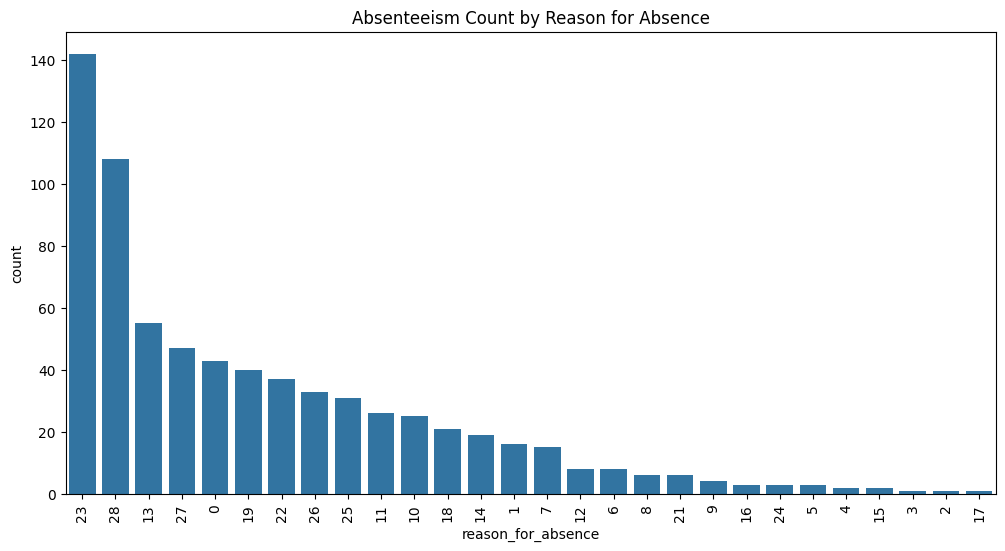

In [23]:
# 1. Absenteeism by Reason
plt.figure(figsize=(12,6))
sns.countplot(x='reason_for_absence', data=df, order=df['reason_for_absence'].value_counts().index)
plt.title("Absenteeism Count by Reason for Absence")
plt.xticks(rotation=90)
plt.show()

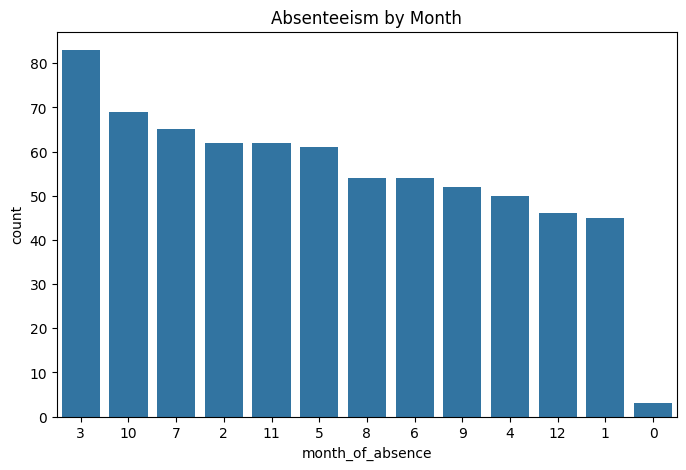

In [24]:
# 2. Absenteeism by Month
plt.figure(figsize=(8,5))
sns.countplot(x='month_of_absence', data=df, order=df['month_of_absence'].value_counts().index)
plt.title("Absenteeism by Month")
plt.show()

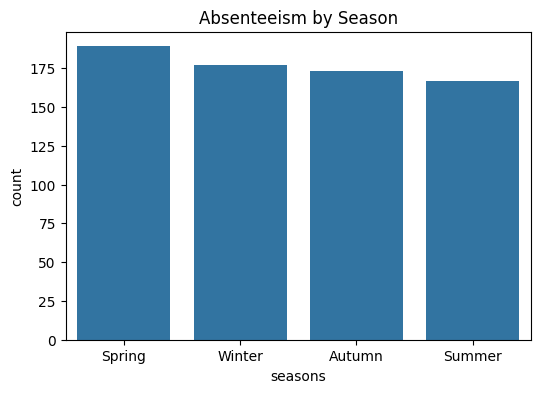

In [25]:
# 3. Absenteeism by Season
plt.figure(figsize=(6,4))
sns.countplot(x='seasons', data=df, order=df['seasons'].value_counts().index)
plt.title("Absenteeism by Season")
plt.show()

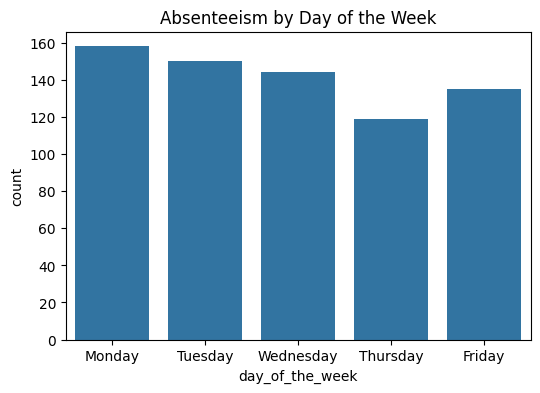

In [26]:
# 4. Absenteeism by Day of the Week
plt.figure(figsize=(6,4))
sns.countplot(x='day_of_the_week', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday'])
plt.title("Absenteeism by Day of the Week")
plt.show()

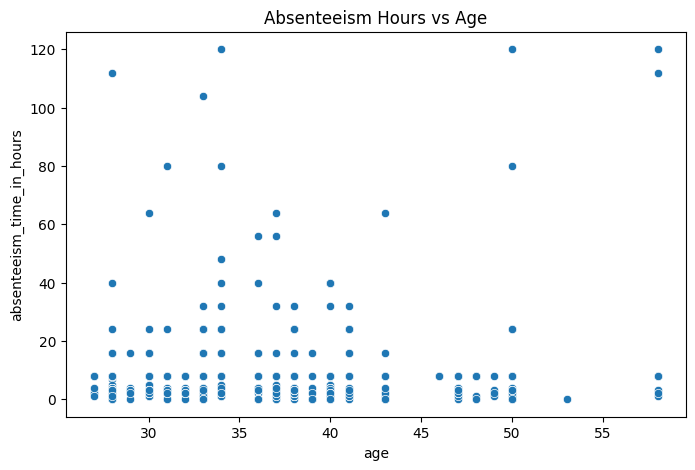

In [27]:
# 5. Age vs Absenteeism Hours
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='absenteeism_time_in_hours', data=df)
plt.title("Absenteeism Hours vs Age")
plt.show()

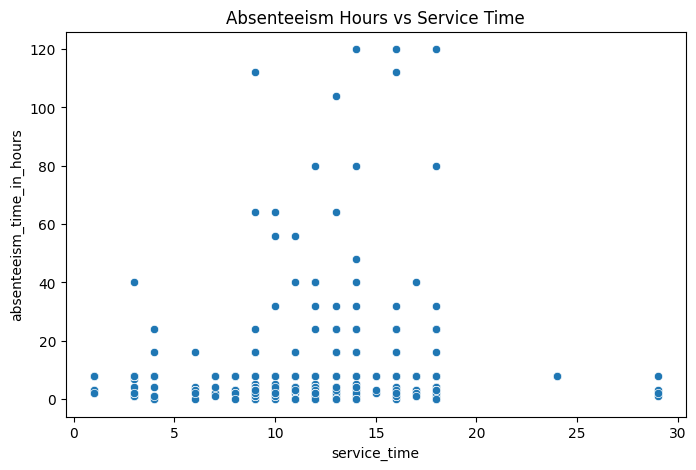

In [28]:
# 6. Service Time vs Absenteeism
plt.figure(figsize=(8,5))
sns.scatterplot(x='service_time', y='absenteeism_time_in_hours', data=df)
plt.title("Absenteeism Hours vs Service Time")
plt.show()

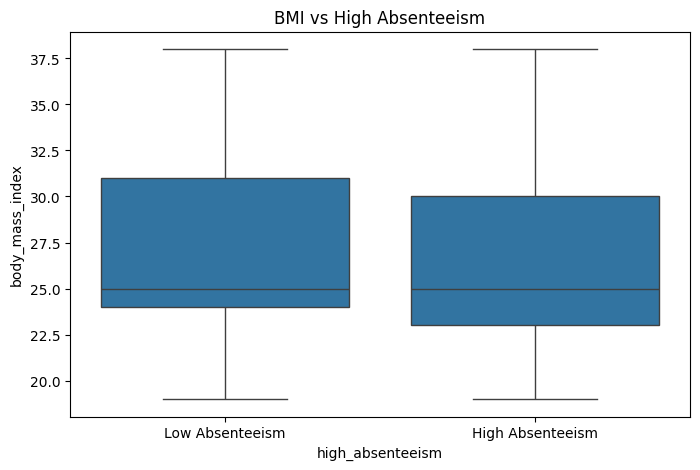

In [29]:
# 7. BMI vs High Absenteeism
plt.figure(figsize=(8,5))
sns.boxplot(x='high_absenteeism', y='body_mass_index', data=df)
plt.title("BMI vs High Absenteeism")
plt.xticks([0,1], ['Low Absenteeism','High Absenteeism'])
plt.show()

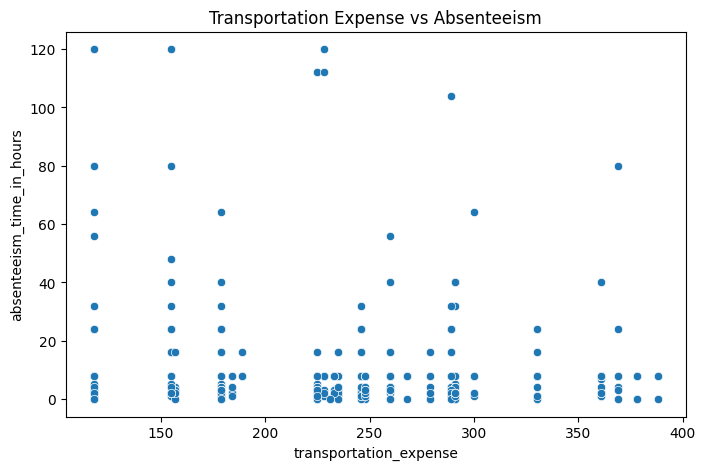

In [30]:
# 8. Transportation Expense vs Absenteeism
plt.figure(figsize=(8,5))
sns.scatterplot(x='transportation_expense', y='absenteeism_time_in_hours', data=df)
plt.title("Transportation Expense vs Absenteeism")
plt.show()


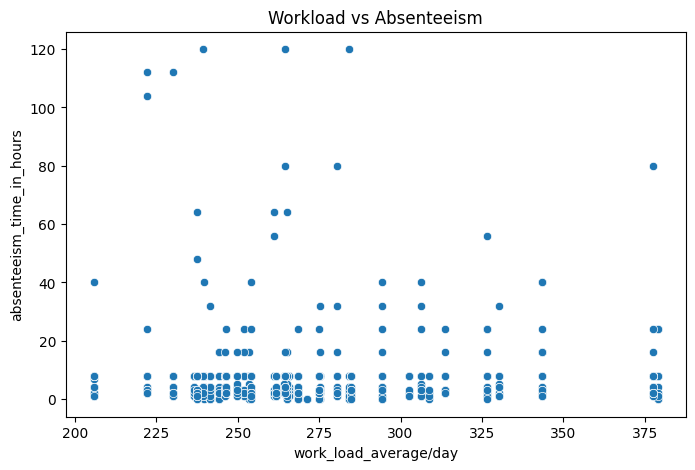

In [32]:
# 9. Workload vs Absenteeism
plt.figure(figsize=(8,5))
sns.scatterplot(x='work_load_average/day', y='absenteeism_time_in_hours', data=df)
plt.title("Workload vs Absenteeism")
plt.show()

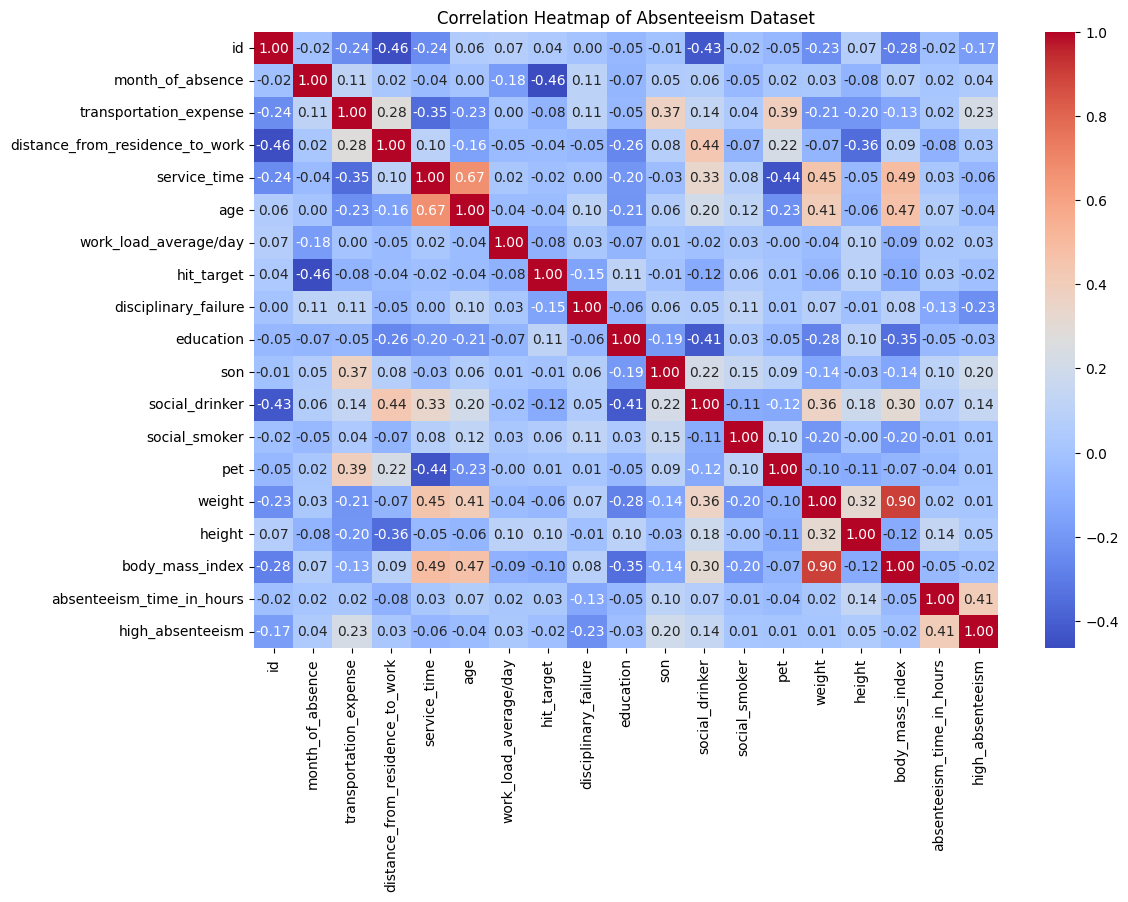

In [34]:
# 10. Correlation Heatmap
plt.figure(figsize=(12,8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Absenteeism Dataset")
plt.show()

**Key Insights**  
1. Certain reasons (like sickness, medical consultation) dominate absenteeism.  
2. Absenteeism is higher in certain months (seasonal trends).  
3. More absences occur in Winter compared to other seasons.  
4. Absences are slightly higher at the start of the week (Mondays).  
5. Younger employees (age < 30) show slightly higher absenteeism.  
6. Employees with longer service time (>10 years) also have moderate absenteeism.  
7. Higher BMI (obesity) is linked to higher absenteeism hours.  
8. Employees with higher transportation expenses tend to miss more hours.  
9. Very high workload days sometimes increase absenteeism hours.  
10. Correlation shows absenteeism is weakly linked with workload, BMI, and transportation expense.  


**Conclusion**  
The analysis of the Absenteeism at Work dataset reveals that employee absenteeism is influenced by multiple factors including health, seasonality, transportation, and demographics. Organizations should focus on:  

- Wellness programs to reduce health-related absenteeism.  
- Flexible work arrangements during high-absence months (e.g., winter).  
- Providing support for employees with high commuting costs.  
- Monitoring workload to avoid burnout and absence.  

By applying data-driven HR strategies, absenteeism can be reduced, thereby improving productivity and employee well-being.  
